In [44]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF100_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_100'

In [46]:
def calc_residual(stego, cover):
    residual = np.abs(stego.astype(np.int16) - cover.astype(np.int16)).astype(np.uint8)
    return residual

In [47]:
def show_img(cover_path: str, stego_path: str, count: int, multiple: int,
                                            color_B: int, color_G, color_R):

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:].lower() == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    for filename in stego_filenames[:count]:
        stego = cv2.imread(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = cv2.imread(os.path.join(cover_path, filename_c))

        img_s = calc_residual(stego, cover) * multiple

        channels = cv2.split(img_s)
        colors = ['B', 'G', 'R']
        color_t = ['b', 'g', 'r']

        for ch, color in zip(channels, colors):
            ch_total = np.cumsum(ch)
            if color == 'B':
                color_B += ch_total[-1]
            if color == 'G':
                color_G += ch_total[-1]
            if color == 'R':
                color_R += ch_total[-1]

    print('number of file: ', count)

    values = [color_B, color_G, color_R]
    plt.figure(figsize=(7,7))

    ch_per = [0,0,0]

    for i in range(3):
        ch_per[i] = values[i] /sum(values) * 100

    x = np.arange(3)
    plt.bar(x, ch_per, color = color_t)
    plt.title('Plot of channel', fontsize=20)

    for index, value in enumerate(ch_per):
        plt.text(index - 0.125 , value + 0.5, str(value)[:5]+"%")

    plt.xticks(x, colors)
    plt.yticks(fontsize = 20)

    plt.show()

number of file:  10


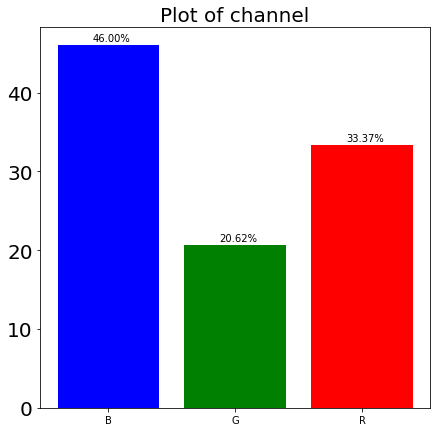

In [48]:
#bpp 0.01, multiple 50
show_img(cover_path, stego_path, 10, 1, 0, 0, 0)